<h5>Датасет:</h5>
Использован датасет (https://www.kaggle.com/dixienewsome/cycling) <br>
Датасет содержит информацию о записях заездов на велосипеде различных людей. Состоит из 18 колонок и 340 строк. Поскольку не у всех велосипедистов при записи тренировки присутствуют все датчики, некоторые столбцы содержат достаточное большое количество пропусков.
<h5>Колонки:</h5>
Activity Type - тип заезда <br>
Date - дата<br>
Distance - расстояние в милях<br>
Calories - калории<br>
Time - время<br>
Avg HR - средний пульс<br>
Max HR - максимальный пульс<br>
Avg Speed - средняя скорость<br>
Max Speed - максимальная скорость<br>
Elev Gain - подъем<br>
Elev Loss - спуск<br>
Avg Bike Cadence - средний каденс<br>
Max Bike Cadence - максимальный каденс<br>
Normalized Power - средняя мощность<br>
Training Stress Score(TSS) - вычисленное значение нагрузки / сложность<br>
Max Avg Power (20 min) - максимальная мощность за 20 минут<br>
Power - мощность<br>
Max Power - максимальная мощность<br><br>
with more info faster


In [126]:
import numpy as np
import pandas as pd
import matplotlib as mpl
import matplotlib.pyplot as plt
import seaborn as sns
import warnings; warnings.filterwarnings(action='once')

large = 22; med = 16; small = 12
params = {'axes.titlesize': large,
          'legend.fontsize': med,
          'figure.figsize': (16, 10),
          'axes.labelsize': med,
          'axes.titlesize': med,
          'xtick.labelsize': med,
          'ytick.labelsize': med,
          'figure.titlesize': large}
plt.rcParams.update(params)
plt.style.use('seaborn-whitegrid')
sns.set_style("white")
%matplotlib inline

In [127]:
df_c = pd.read_csv("Data Cycling_edited.csv")
df_c = df_c.rename(columns = {
    'Activity Type' : 'activity_type',
    'Date' : 'date',
    'Distance' : 'distance',
    'Calories' : 'calories',
    'Time' : 'time',
    'Avg HR' : 'avg_HR',
    'Max HR' : 'max_HR',
    'Avg Speed' : 'avg_speed',
    'Max Speed' : 'max_speed',
    'Elev Gain' : 'elev_gain',
    'Elev Loss' : 'elev_loss',
    'Avg Bike Cadence' : 'avg_cadence',
    'Max Bike Cadence' : 'max_cadence',
    'Normalized Power® (NP®)' : 'norm_power',
    'Training Stress Score®' : 'TSS',
    'Max Avg Power (20 min)' : 'max_avg_power',
    'Power' : 'power',
    'Max Power' : 'max_power',
})

df_c.date = pd.to_datetime(df_c.date, format='%m/%d/%Y %H:%M')
time_s = [l.split(':') for l in df_c.time.to_numpy()]
for i,l in enumerate(time_s):
    if len(l) == 3:
        time_s[i] = int(l[0])*3600 + int(l[1]) * 60 + float(l[2])
    elif len(l) == 2:
        time_s[i] = int(l[0]) * 60 + float(l[1])
df_c['time_s'] = time_s
df_c.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 340 entries, 0 to 339
Data columns (total 19 columns):
 #   Column         Non-Null Count  Dtype         
---  ------         --------------  -----         
 0   activity_type  340 non-null    object        
 1   date           340 non-null    datetime64[ns]
 2   distance       340 non-null    float64       
 3   calories       333 non-null    float64       
 4   time           340 non-null    object        
 5   avg_HR         311 non-null    float64       
 6   max_HR         311 non-null    float64       
 7   avg_speed      331 non-null    float64       
 8   max_speed      327 non-null    float64       
 9   elev_gain      198 non-null    float64       
 10  elev_loss      198 non-null    float64       
 11  avg_cadence    255 non-null    float64       
 12  max_cadence    255 non-null    float64       
 13  norm_power     280 non-null    float64       
 14  TSS            340 non-null    float64       
 15  max_avg_power  240 non-

In [128]:
df_c.activity_type.unique()

array(['indoor_cycling', 'road_biking', 'cyclocross', 'cycling',
       'virtual_ride'], dtype=object)

<h5>Гипотеза:</h5> циклокросс подразумевает движение по пересеченной местности и, соответственно, меньшую скорость, чем при заезде по шоссе

In [129]:
print(df_c.loc[df_c.activity_type == "cyclocross"].avg_speed.mean(), "- avg_speed for cyclocross")
print(df_c.loc[df_c.activity_type == "road_biking"].avg_speed.mean(), "- avg_speed for biking")

8.42 - avg_speed for cyclocross
16.42654867256637 - avg_speed for biking


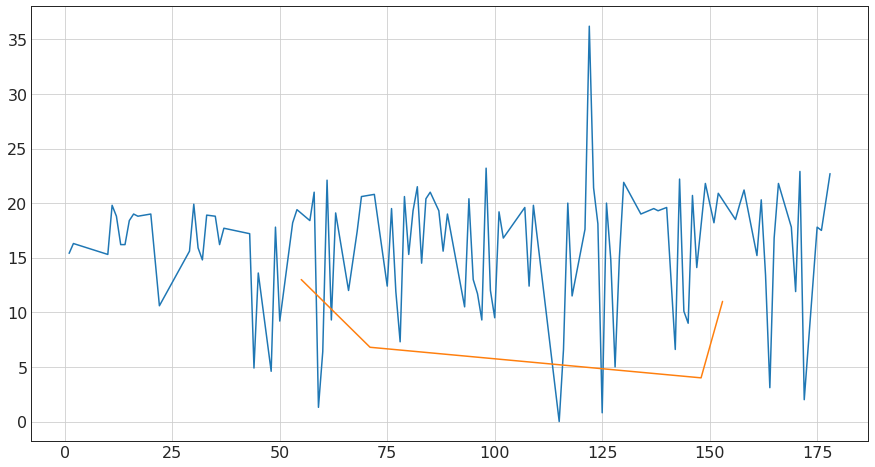

In [130]:
df_c.loc[(df_c.activity_type == "road_biking") & (df_c.avg_speed < 50) & (df_c.time_s > 60)].avg_speed.plot()
df_c.loc[(df_c.activity_type == "cyclocross") & (df_c.avg_speed < 50) & (df_c.time_s > 60)].avg_speed.plot(figsize =[15,8], grid = True)


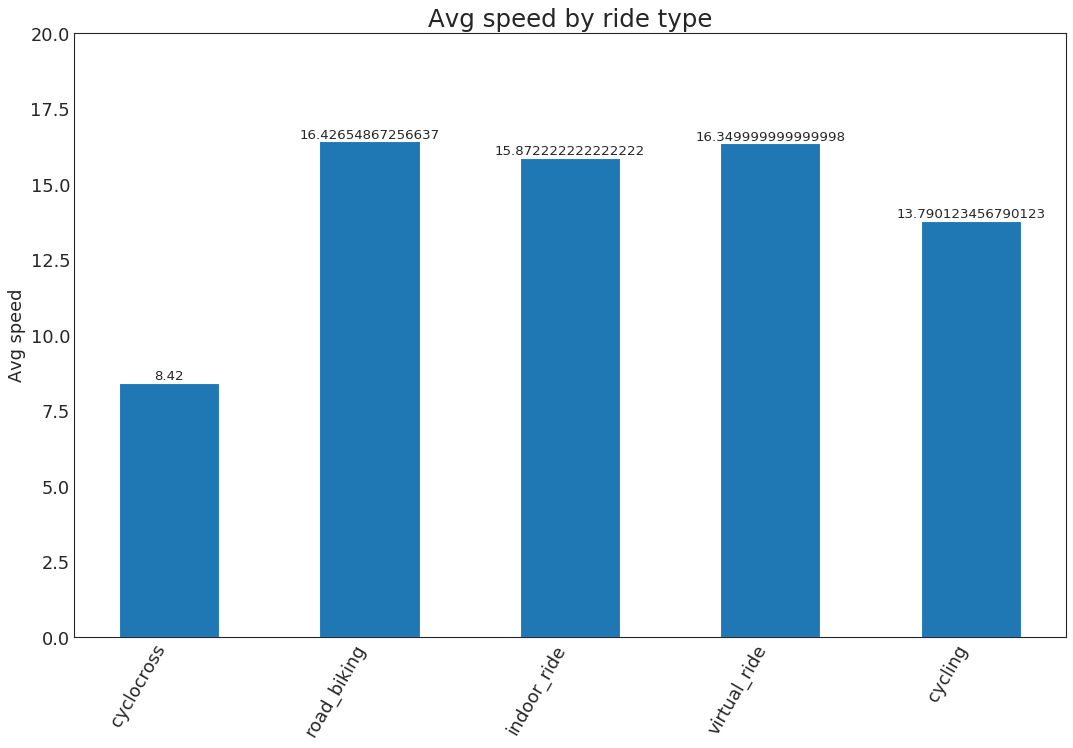

In [154]:
df = pd.DataFrame({

    'avg_speed': [
        df_c.loc[df_c.activity_type == "cyclocross"].avg_speed.mean(),
        df_c.loc[df_c.activity_type == "road_biking"].avg_speed.mean(),
        df_c.loc[df_c.activity_type == "indoor_cycling"].avg_speed.mean(),
        df_c.loc[df_c.activity_type == "virtual_ride"].avg_speed.mean(),
        df_c.loc[df_c.activity_type == "cycling"].avg_speed.mean()],

    'max_speed': [
        df_c.loc[df_c.activity_type == "cyclocross"].max_speed.mean(),
        df_c.loc[df_c.activity_type == "road_biking"].max_speed.mean(),
        df_c.loc[df_c.activity_type == "indoor_cycling"].max_speed.mean(),
        df_c.loc[df_c.activity_type == "virtual_ride"].max_speed.mean(),
        df_c.loc[df_c.activity_type == "cycling"].max_speed.mean()],
    "activity_type": ['cyclocross', 'road_biking', 'indoor_ride', 'virtual_ride', 'cycling']
    }, 
    )


n = df['activity_type'].unique().__len__()+1

# Plot Bars
plt.figure(figsize=(16,10), dpi= 80)
plt.bar(df['activity_type'], df['avg_speed'], width=.5)
for i, val in enumerate(df['avg_speed'].values):
    plt.text(i, val, float(val), horizontalalignment='center', verticalalignment='bottom', fontdict={'fontweight':500, 'size':12})

# Decoration
plt.gca().set_xticklabels(df['activity_type'], rotation=60, horizontalalignment= 'right')
plt.title("Avg speed by ride type", fontsize=22)
plt.ylabel('Avg speed')
plt.ylim(0, 20)
plt.show()

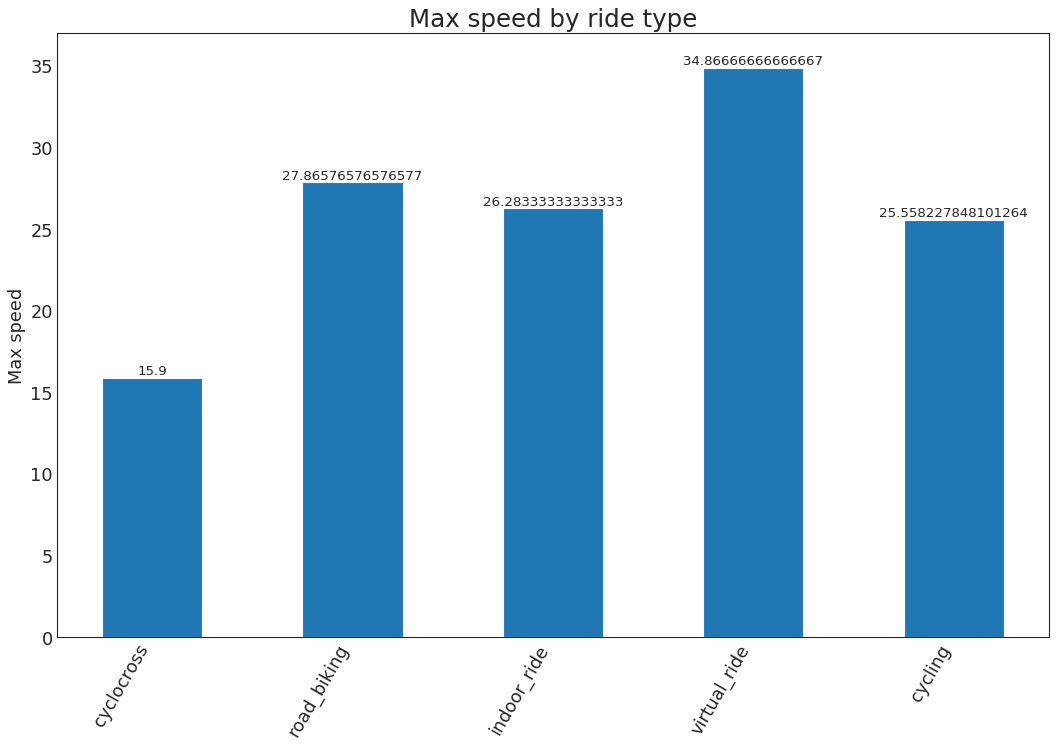

In [158]:

n = df['activity_type'].unique().__len__()+1

# Plot Bars
plt.figure(figsize=(16,10), dpi= 80)
plt.bar(df['activity_type'], df['max_speed'], width=.5)
for i, val in enumerate(df['max_speed'].values):
    plt.text(i, val, float(val), horizontalalignment='center', verticalalignment='bottom', fontdict={'fontweight':500, 'size':12})

# Decoration
plt.gca().set_xticklabels(df['activity_type'], rotation=60, horizontalalignment= 'right')
plt.title("Max speed by ride type", fontsize=22)
plt.ylabel('Max speed')
plt.ylim(0, 37)
plt.show()

Гипотеза подтверждается

In [132]:
df_c.loc[(df_c.activity_type == "road_biking") & (df_c.avg_speed.max() == df_c.avg_speed)]

,activity_type,date,distance,calories,time,avg_HR,max_HR,avg_speed,max_speed,elev_gain,elev_loss,avg_cadence,max_cadence,norm_power,TSS,max_avg_power,power,max_power,time_s
21,road_biking,2018-09-16 17:30:00,0.02,NaN,00:00.8,83.0,83.0,111.2,41.9,NaN,NaN,NaN,NaN,NaN,0.0,NaN,NaN,NaN,0.8


Была замечена слишком большая средняя скорость, видим ошибку в датасете, вносим изменения в графике (добавляем ограничение на максимальное значение средней скорости и минимальное значение времени)

<h5>Гипотеза:</h5>
Такие датчики, как пульсометр и измеритель мощности и каденса в основном используются профессиональными спортсменами, поэтому скорость заездов, содержащих информацию о пульсе, мощности и каденсе, будет больше, чем без них

In [133]:
print(df_c.loc[(df_c.avg_HR.notna()) & (df_c.avg_cadence.notna()) & (df_c.power.notna())].avg_speed.mean(), "- avg_speed with sensors")
print(df_c.loc[(df_c.avg_HR.isna()) & (df_c.avg_cadence.isna()) & (df_c.power.isna())].avg_speed.mean(),  "- avg_speed with no  sensors")

16.113302752293578 - avg_speed with sensors
8.26 - avg_speed with no  sensors


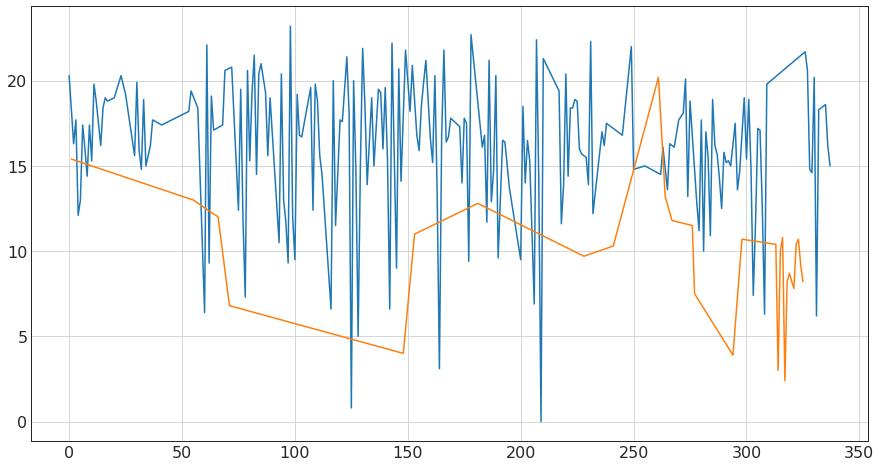

In [134]:
df_c.loc[(df_c.avg_HR.notna()) & (df_c.avg_cadence.notna()) & (df_c.power.notna()) & (df_c.avg_speed < 50) & (df_c.time_s > 60)].avg_speed.plot()
df_c.loc[(df_c.avg_cadence.isna()) & (df_c.power.isna()) & (df_c.avg_speed < 50) & (df_c.time_s > 120)].avg_speed.plot(figsize =[15,8], grid = True)

Почти все заезды без датчиков находятся на графике ниже большинства заездов с датчиками

<h5>Гипотеза:</h5>
Заезды на станке занимают меньше времени, поскольку спортсмену тяжело смотреть в одну точку


In [135]:
print(df_c.loc[(df_c.activity_type != "indoor_cycling") & (df_c.activity_type != "virtual_ride") & (df_c.avg_speed < 50) & (df_c.time_s > 60) & (df_c.time_s < 3600 * 24)].time_s.mean(), "- avg time outdoor")
print(df_c.loc[((df_c.activity_type == "indoor_cycling") | (df_c.activity_type == "virtual_ride")) & (df_c.avg_speed < 50) & (df_c.time_s > 60) & (df_c.time_s < 3600 * 24)].time_s.mean(), "- avg time indoor")

5773.728 - avg time outdoor
5024.318367346939 - avg time indoor


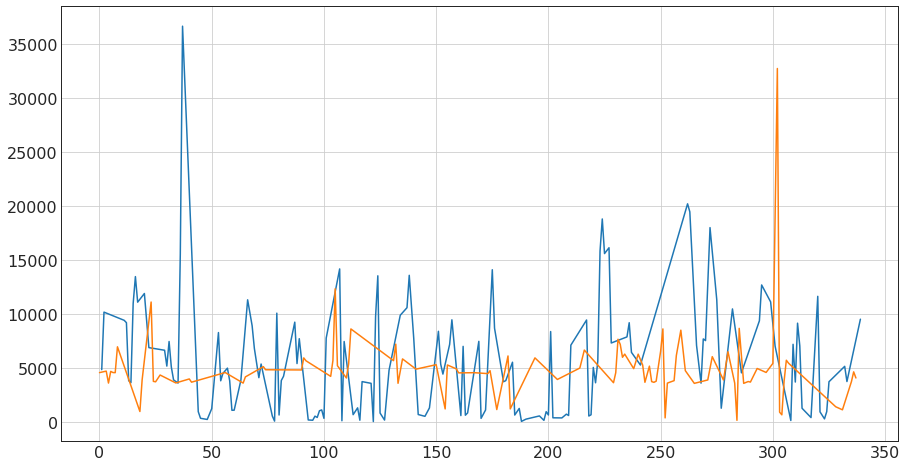

In [136]:
df_c.loc[(df_c.activity_type != "indoor_cycling") & (df_c.activity_type != "virtual_ride") & (df_c.avg_speed < 50) & (df_c.time_s > 60) & (df_c.time_s < 3600 * 24)].time_s.plot()
df_c.loc[((df_c.activity_type == "indoor_cycling") | (df_c.activity_type == "virtual_ride")) & (df_c.avg_speed < 50) & (df_c.time_s > 60) & (df_c.time_s < 3600 * 24)].time_s.plot(figsize =[15,8], grid = True)